[View in Colaboratory](https://colab.research.google.com/github/weiffert/SIGAI-Housing-Data-Analysis/blob/master/LinearRegression.ipynb)

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/PurdueSIGAI/Kaggle-Fall-2018/master/california_housing_train.csv")

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.00,37.55,27,6103,1249,3026,1134,4.1591,332400
1,-122.07,37.93,25,7201,1521,3264,1433,3.7433,252100
2,-118.02,33.90,34,2678,511,1540,497,4.4954,202900
3,-121.79,39.73,8,5690,1189,2887,1077,3.0625,116300
4,-120.90,39.93,23,2679,546,1424,529,2.8812,81900


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000,13598.000000
mean,-119.559762,35.623519,28.564936,2646.105163,539.147228,1427.779894,500.865495,3.881684,206885.214076
std,2.005374,2.138184,12.546966,2173.779547,417.720038,1111.246219,379.887676,1.903772,115587.218841
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1467.000000,298.000000,793.000000,283.000000,2.567400,119325.000000
50%,-118.490000,34.250000,29.000000,2130.000000,435.000000,1169.000000,410.000000,3.548100,180400.000000
75%,-118.000000,37.710000,37.000000,3151.750000,648.750000,1719.750000,607.000000,4.767900,264000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [5]:
type(df["longitude"].head())

pandas.core.series.Series

In [6]:
df["longitude"].head()

0   -122.00
1   -122.07
2   -118.02
3   -121.79
4   -120.90
Name: longitude, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f185d5c9a90>]],
      dtype=object)

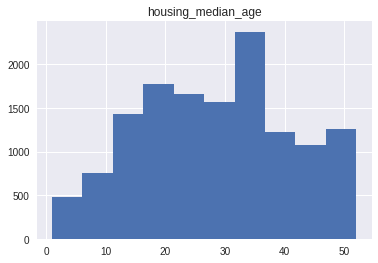

In [8]:
df.hist('housing_median_age')

# Single Variable Linear Regression

In [0]:
X = df['median_income']
y = df['median_house_value']

# Theta is [bias, weight]
theta = [1,1]

In [0]:
# Cost function RMSE

def costFunction(X, y, theta):
  loss = 0
  for i in range(len(X)):
    loss += ((theta[0] + theta[1] * X[i]) - y[i]) ** 2
   
  # Average Loss
  return (1.0/(2.0 * len(X))) * loss

def derivativeOfCostFunctionBias(X, y, theta):
  a = 0
  for i in range(len(X)):
    a += (theta[0] + theta[1] * X[i]) - y[i]
    
  return (1.0 / len(X)) * a

def derivativeOfCostFunctionWeight(X, y, theta):
  a = 0
  for i in range(len(X)):
    a += ((theta[0] + theta[1] * X[i]) - y[i]) * X[1]
    
  return (1.0 / len(X)) * a

In [15]:
costFunction(X, y, theta)

28079295496.022987

In [0]:
# Gradient Descent
def step(learningRate, X, y, theta):
  # do not delete the old weights
  
  newTheta = theta[:]
  newTheta[0] = theta[0] - learningRate * derivativeOfCostFunctionBias(X, y, theta)
  newTheta[1] = theta[1] - learningRate * derivativeOfCostFunctionWeight(X, y, theta)
  return newTheta


In [51]:
theta = [1,1]
for i in range(2000):
  if(i % 10) == 0:
    print(costFunction(X, y, theta), theta)
    
  theta = step(.01, X, y, theta)

28079295496.022987 [1, 1]


KeyboardInterrupt: ignored

In [42]:
print(X)

0         4.1591
1         3.7433
2         4.4954
3         3.0625
4         2.8812
5         6.7599
6         3.1892
7         2.8194
8         1.6094
9         6.6852
10        4.7853
11        6.3639
12        2.2917
13        1.5326
14        5.9114
15        4.8409
16        1.8485
17        6.4265
18        2.7031
19        3.4449
20        2.2750
21        6.7460
22        2.7305
23        1.3240
24        1.5987
25        2.1111
26        3.5638
27       10.7339
28        2.1786
29        3.2216
          ...   
13568     1.9799
13569     3.1538
13570     2.4333
13571    12.2092
13572     3.0989
13573     3.9464
13574     4.6758
13575     2.2500
13576     4.7216
13577     2.1793
13578     2.3293
13579     3.5982
13580     5.0162
13581     4.8371
13582     4.0329
13583     5.0679
13584     1.9479
13585     1.2315
13586     3.5536
13587     2.2321
13588     2.2083
13589     5.4863
13590    10.3416
13591     6.3434
13592    11.8603
13593     7.8375
13594     3.8750
13595     3.46